<a href="https://colab.research.google.com/github/vsairam-uc/GenAI-and-LLM/blob/main/convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize

## Original Input Image

(64, 64)


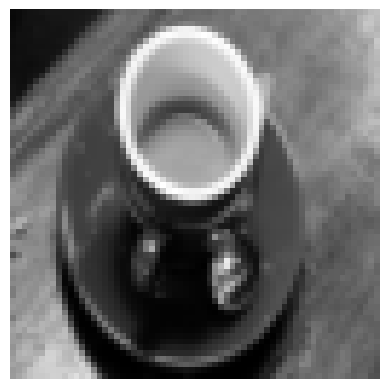

In [ ]:
im = rgb2gray(data.coffee())
im = resize(im, (64, 64))
print(im.shape)

plt.axis("off")
plt.imshow(im, cmap="gray")

## Convolution Filter Analysis

In [ ]:
def apply_convolution_and_draw_image(im, filter, stride=1):
  new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

  im_pad = np.pad(im, 1, "constant")

  for i in range(0, im.shape[0], stride):
      for j in range(0, im.shape[1], stride):
          try:
              new_image[int(i / stride), int(j / stride)] = (
                  im_pad[i - 1, j - 1] * filter[0, 0]
                  + im_pad[i - 1, j] * filter[0, 1]
                  + im_pad[i - 1, j + 1] * filter[0, 2]
                  + im_pad[i, j - 1] * filter[1, 0]
                  + im_pad[i, j] * filter[1, 1]
                  + im_pad[i, j + 1] * filter[1, 2]
                  + im_pad[i + 1, j - 1] * filter[2, 0]
                  + im_pad[i + 1, j] * filter[2, 1]
                  + im_pad[i + 1, j + 1] * filter[2, 2]
              )
          except:
              pass

  plt.axis("off")
  plt.imshow(new_image, cmap="Greys")

In [ ]:
horizontal_filter = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
vertical_filter = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

### Stride 1

Horizontal


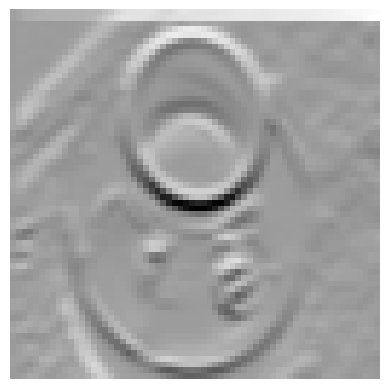

In [ ]:
print('Horizontal')
apply_convolution_and_draw_image(im, horizontal_filter,stride=1)

Vertical


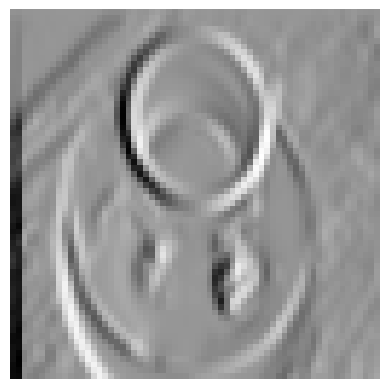

In [ ]:
print('Vertical')
apply_convolution_and_draw_image(im, vertical_filter,stride=1)

### Stride 2

Horizontal


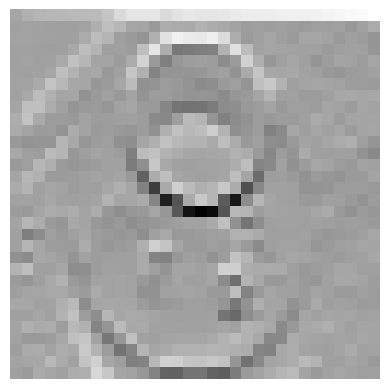

In [ ]:
print('Horizontal')
apply_convolution_and_draw_image(im, horizontal_filter,stride=2)

Vertical


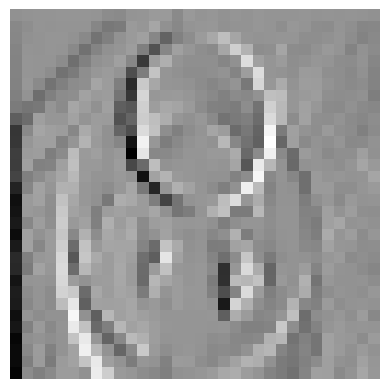

In [ ]:
print('Vertical')
apply_convolution_and_draw_image(im, vertical_filter,stride=2)

### Stride 4

Horizontal


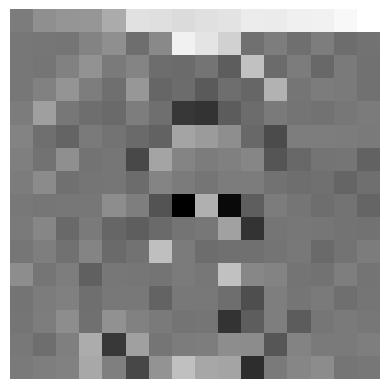

In [ ]:
print('Horizontal')
apply_convolution_and_draw_image(im, horizontal_filter,stride=4)

Vertical


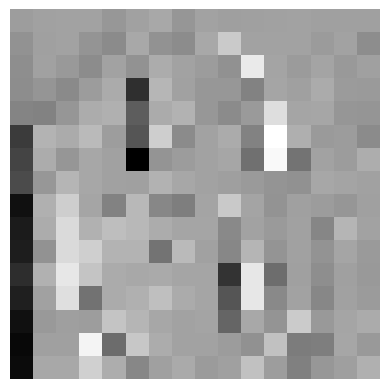

In [ ]:
print('Vertical')
apply_convolution_and_draw_image(im, vertical_filter,stride=4)

## Build CNN Network


In [ ]:
import numpy as np

from tensorflow.keras import layers, models, optimizers, utils, datasets
from IPython.display import display

In [ ]:
NUM_CLASSES = 10

### Data Preparation

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

### Build Model V1

In [ ]:
input_layer = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(
    input_layer
)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation("softmax")(x)

model_1 = models.Model(input_layer, output_layer)

model_1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,2

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
input_layer = layers.Input((32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(
    input_layer
)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size=3, strides=4, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=3, strides=4, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation("softmax")(x)

model_2 = models.Model(input_layer, output_layer)

model_2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_20 (LeakyReLU)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_21 (LeakyReLU)           │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_22 (LeakyReLU)           │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_23 (LeakyReLU)           │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_24 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,2

 Total params: 101,034 (394.66 KB)

 Trainable params: 100,394 (392.16 KB)

 Non-trainable params: 640 (2.50 KB)

### Train model

In [ ]:
opt = optimizers.Adam(learning_rate=0.0005)
model_1.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)
model_1.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 124ms/step - accuracy: 0.3835 - loss: 1.8036 - val_accuracy: 0.5921 - val_loss: 1.1494
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 123ms/step - accuracy: 0.5876 - loss: 1.1664 - val_accuracy: 0.5713 - val_loss: 1.2045
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 211s 129ms/step - accuracy: 0.6521 - loss: 0.9949 - val_accuracy: 0.6712 - val_loss: 0.9339
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 182s 116ms/step - accuracy: 0.6854 - loss: 0.8938 - val_accuracy: 0.7090 - val_loss: 0.8416
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 232s 136ms/step - accuracy: 0.7063 - loss: 0.8370 - val_accuracy: 0.6828 - val_loss: 0.9318
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 127ms/step - accuracy: 0.7320 - loss: 0.7746 - val_accuracy: 0.7204 - val_loss: 0.8054
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 117ms/step - accuracy: 0.7463 - loss: 0.7330 - val_accuracy: 0.7122 - val_loss: 0.8282
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 110ms/step - ac

In [41]:
opt = optimizers.Adam(learning_rate=0.0005)
model_2.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)
model_2.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 57ms/step - accuracy: 0.3204 - loss: 1.9853 - val_accuracy: 0.4964 - val_loss: 1.4131
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 54ms/step - accuracy: 0.4853 - loss: 1.4321 - val_accuracy: 0.5556 - val_loss: 1.2296
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 54ms/step - accuracy: 0.5449 - loss: 1.2705 - val_accuracy: 0.5760 - val_loss: 1.1843
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.5896 - loss: 1.1584 - val_accuracy: 0.5455 - val_loss: 1.2926
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 53ms/step - accuracy: 0.6159 - loss: 1.0876 - val_accuracy: 0.5674 - val_loss: 1.2287
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.6397 - loss: 1.0214 - val_accuracy: 0.5618 - val_loss: 1.2783
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 53ms/step - accuracy: 0.6598 - loss: 0.9689 - val_accuracy: 0.6226 - val_loss: 1.0660
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.67

### Evaluation

In [ ]:

CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

def predict_and_plot_random(model, x_test, y_test, n=10):
  preds = model.predict(x_test)
  preds_single = CLASSES[np.argmax(preds, axis=-1)]
  actual_single = CLASSES[np.argmax(y_test, axis=-1)]
  indices = np.random.choice(range(len(x_test)), n)

  fig = plt.figure(figsize=(15, 3))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)

  for i, idx in enumerate(indices):
      img = x_test[idx]
      ax = fig.add_subplot(1, n, i + 1)
      ax.axis("off")
      ax.text(
          0.5,
          -0.35,
          "pred = " + str(preds_single[idx]),
          fontsize=10,
          ha="center",
          transform=ax.transAxes,
      )
      ax.text(
          0.5,
          -0.7,
          "act = " + str(actual_single[idx]),
          fontsize=10,
          ha="center",
          transform=ax.transAxes,
      )
      ax.imshow(img)
  plt.show()

In [ ]:
model_1_eval = model_1.evaluate(x_test, y_test, batch_size=1000)


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 905ms/step - accuracy: 0.7233 - loss: 0.8221


Model 1 Evaluation: [0.8202439546585083, 0.7233999967575073]
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step


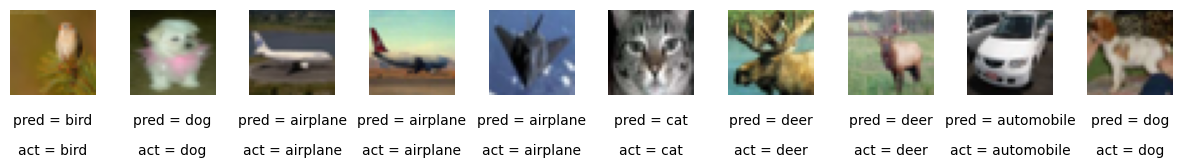

In [ ]:
print(f"Model 1 Evaluation: {model_1_eval}")
predict_and_plot_random(model_1, x_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 791ms/step - accuracy: 0.6507 - loss: 0.9969
Model 2 Evaluation: [1.0176057815551758, 0.644599974155426]
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step


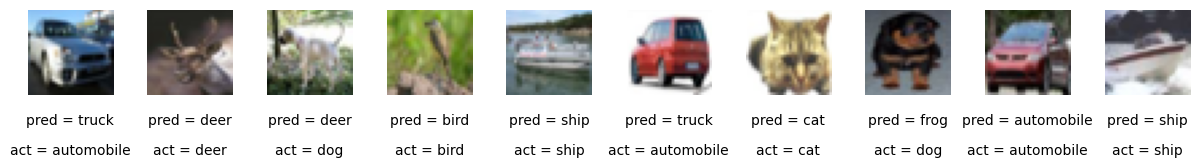

In [43]:
model_2_eval = model_2.evaluate(x_test, y_test, batch_size=1000)
print(f"Model 2 Evaluation: {model_2_eval}")
predict_and_plot_random(model_2, x_test, y_test)